# Demo for exercise 5.12 code usage

Based on vojtamolda's [repo](https://github.com/vojtamolda/reinforcement-learning-an-introduction/tree/main/chapter05).

In [3]:
import numpy as np

import ex5_12

Racetrack is given by a csv file

In [7]:
racetrack = './racetrack/fig5-5a.csv'
env = ex5_12.RacetrackNoisy(racetrack)

To reduce the computation time, actions that don't change velocity are excluded from the policy. See function ```restrict_actions()``` of the ```RacetrackDemo``` class.

In [7]:
q = dict()
policy = dict()
for state, actions in env.state_actions.items():
    actions_number = len(actions)
    q[state] = np.zeros(actions_number)
    policy[state] = np.ones(actions_number) / actions_number

I found that Monte-Carlo policy improve algorithm works faster if it is run with increasing number of episodes. It's enough to make 100_000 runs to get satisfactory results.

In [13]:
powers = range(1, 7)
for power in powers:
    episodes_num = 10 ** power
    q, policy = ex5_12.mc_on_policy_control(env, q, policy, episodes_num)

100%|██████████| 1000000/1000000 [15:31<00:00, 1074.06it/s]


Render result

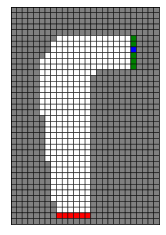

In [19]:
state = env.state
action = np.argmax(policy[state])
action = env.state_actions[state][action]
env.step_demo(action)
env.render()

### Same for figure 5.5b

In [20]:
racetrack = './racetrack/fig5-5b.csv'
env1 = ex5_12.RacetrackNoisy(racetrack)

q1 = dict()
policy1 = dict()
for state, actions in env1.state_actions.items():
    actions_number = len(actions)
    q1[state] = np.zeros(actions_number)
    policy1[state] = np.ones(actions_number) / actions_number

In [351]:
powers = range(1, 7)
for power in powers:
    episodes_num = 10 ** power
    q1, policy1 = ex5_12.mc_on_policy_control(env1, q1, policy1, episodes_num)


100%|██████████| 1000000/1000000 [10:49<00:00, 1539.96it/s]


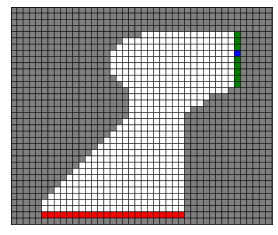

In [29]:
state = env1.state
action = np.argmax(policy1[state])
action = env1.state_actions[state][action]
env1.step_demo(action)
env1.render()